In [10]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('spam.csv')

In [4]:
df.sample(5)

,v1,v2,Unnamed1,Unnamed2,Unnamed3
2287,ham,Alex knows a guy who sells mids but he's down ...,NaN,NaN,NaN
316,ham,Hmmm... Guess we can go 4 kb n power yoga... H...,NaN,NaN,NaN
2797,ham,Purity of friendship between two is not about ...,NaN,NaN,NaN
3088,ham,What Today-sunday..sunday is holiday..so no wo...,NaN,NaN,NaN
4388,ham,"K I'm ready, &lt;#&gt; ?",NaN,NaN,NaN


# 1. Data cleaning

In [5]:
df.isnull().sum()

v1             0
v2             0
Unnamed1    5522
Unnamed2    5560
Unnamed3    5566
dtype: int64

Dropping last 3 columns

In [6]:
df.drop(columns=['Unnamed1', 'Unnamed2', 'Unnamed3'], inplace= True)

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.shape

(5572, 2)

renaming columns name

In [13]:
df.rename(columns= {'v1':'label', 'v2':'features'}, inplace= True)

In [14]:
df

,label,features
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()

In [21]:
df['label'] = encoder.fit_transform(df['label'])

ham = 0

spam = 1

In [22]:
df.sample(5)

,label,features
4354,0,"Sorry, I can't help you on this."
2618,0,Hey pple...$700 or $900 for 5 nights...Excelle...
345,0,Gudnite....tc...practice going on
5349,0,I'm home...
2659,0,Ok...


In [23]:
# missing values
df.isnull().sum()

label       0
features    0
dtype: int64

In [24]:
# check for duplicate values
df.duplicated().sum()

403

In [25]:
# Removing duplicated values
df = df.drop_duplicates(keep= 'first')

In [28]:
df.duplicated().sum()

0

In [30]:
df.shape

(5169, 2)

EDA

In [31]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

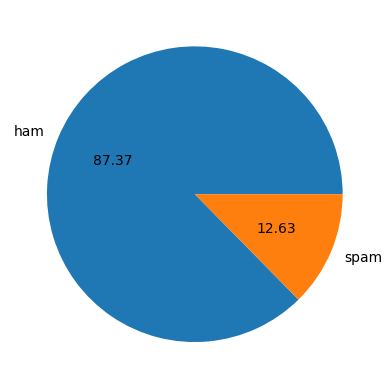

In [35]:
plt.pie(df['label'].value_counts(), labels= ['ham', 'spam'], autopct= '%0.2f')
plt.show()

In [36]:
# Data is imbalanced

In [37]:
import nltk

In [48]:
nltk.download("punkt")
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mahdi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Mahdi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [49]:
# Num of alphabets
df['Num_Of_Characters'] = df['features'].apply(len)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_10232\2032085143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_Of_Characters'] = df['features'].apply(len)


In [50]:
df.head()

,label,features,Num_Of_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [53]:
# Number of words
df['num_words'] = df['features'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_10232\1793257176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['features'].apply(lambda x:len(nltk.word_tokenize(x)))


In [54]:
df.head()

,label,features,Num_Of_Characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [57]:
# Counting no of sentences
df['num_sentences'] = df['features'].apply(lambda x : len(nltk.sent_tokenize(x)))

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_10232\401154679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['features'].apply(lambda x : len(nltk.sent_tokenize(x)))


In [59]:
df.head()

,label,features,Num_Of_Characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [60]:
df[['Num_Of_Characters', 'num_words', 'num_sentences']].describe()

,Num_Of_Characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.456761,1.966531
std,58.175349,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [64]:
# ham
df[df['label'] == 0][['Num_Of_Characters', 'num_words', 'num_sentences']].describe()

,Num_Of_Characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [67]:
# spam
df[df['label'] == 1][['Num_Of_Characters', 'num_words', 'num_sentences']].describe()

,Num_Of_Characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


Text(0.5, 1.0, 'No of characters in SMS')

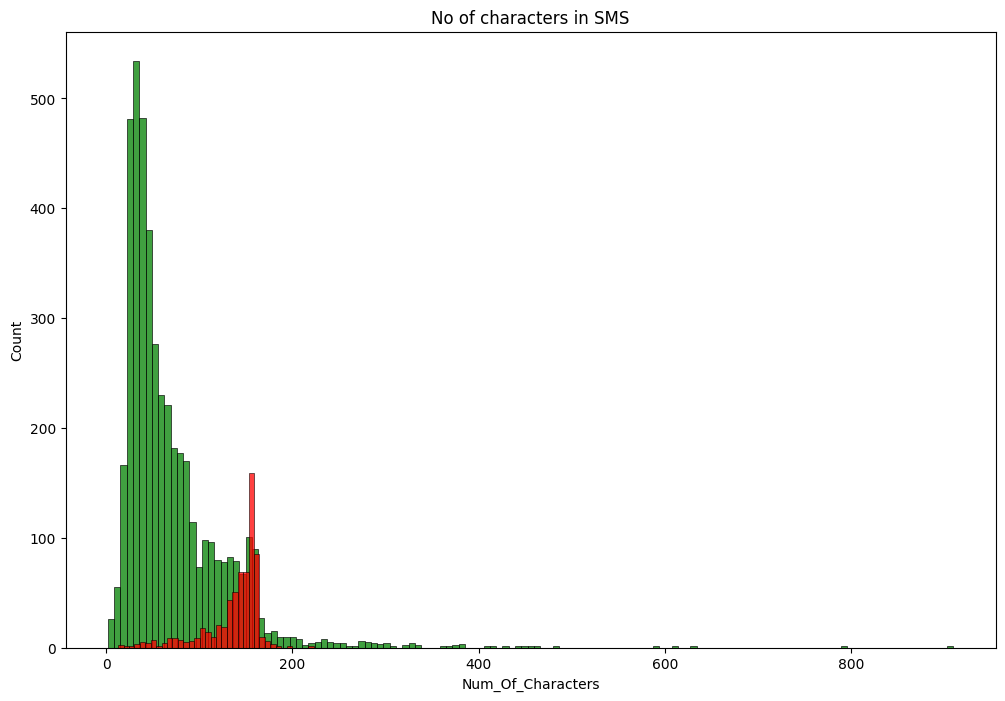

In [78]:
plt.figure(figsize= (12, 8))
sns.histplot(df[df['label'] == 0]['Num_Of_Characters'], color= 'green')
sns.histplot(df[df['label'] == 1]['Num_Of_Characters'], color= 'red')
plt.title("No of characters in SMS")

Text(0.5, 1.0, 'No of words in SMS')

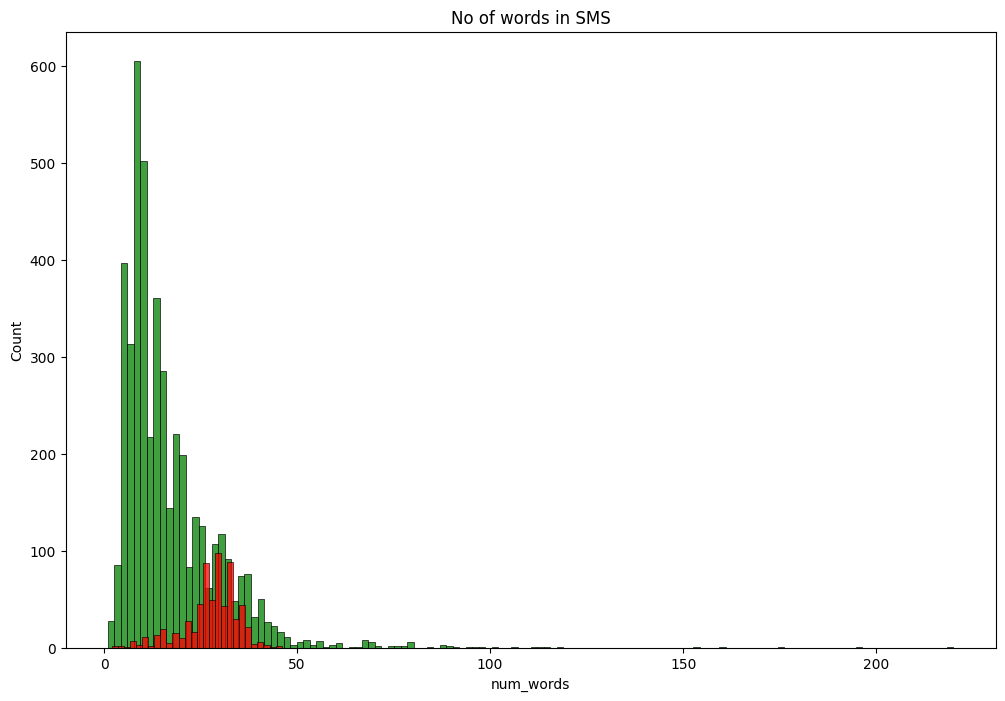

In [79]:
plt.figure(figsize= (12, 8))
sns.histplot(df[df['label'] == 0]['num_words'], color= 'green')
sns.histplot(df[df['label'] == 1]['num_words'], color= 'red')
plt.title("No of words in SMS")

Text(0.5, 1.0, 'No of sentences in SMS')

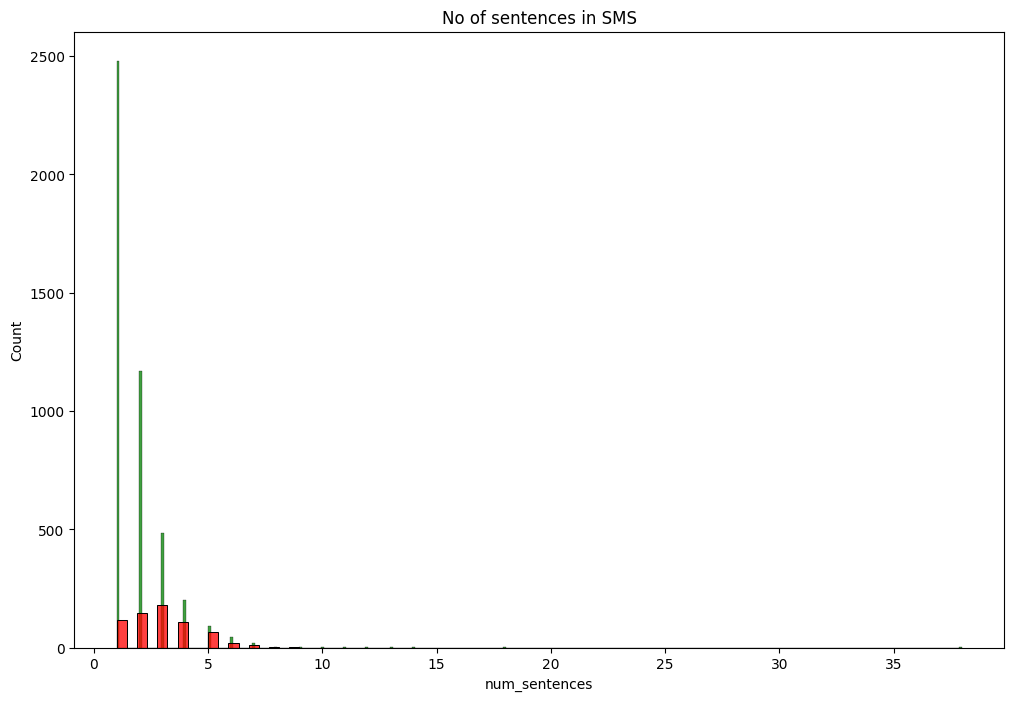

In [82]:
plt.figure(figsize= (12, 8))
sns.histplot(df[df['label'] == 0]['num_sentences'], color= 'green')
sns.histplot(df[df['label'] == 1]['num_sentences'], color= 'red')
plt.title("No of sentences in SMS")

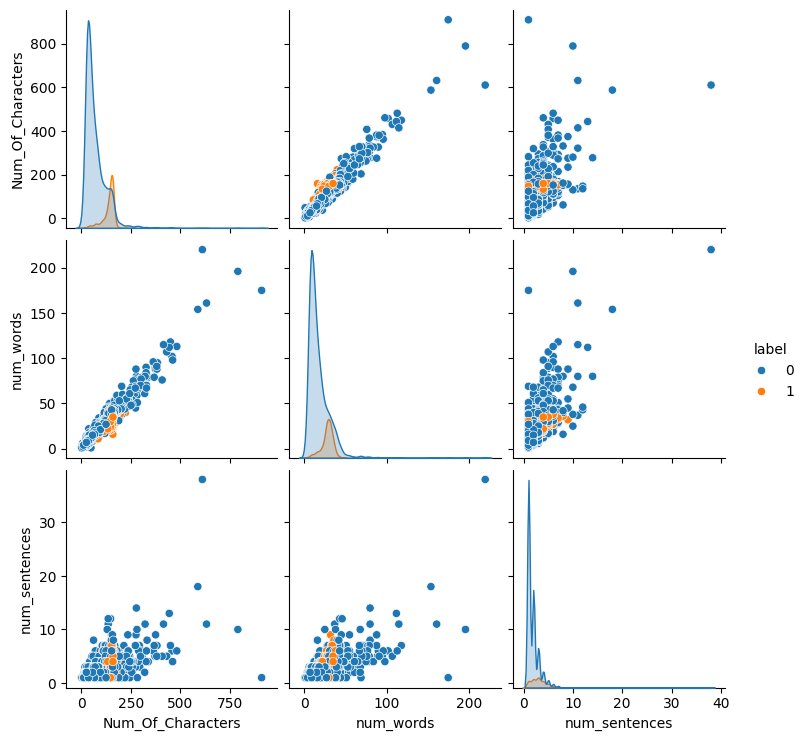

In [83]:
sns.pairplot(df, hue= 'label')

In [111]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

### Data preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stopwords and punctuation
- Stemming

In [113]:
def transform_text(text):
    # Lower case
    text = text.lower()

    # Tokenization
    text = nltk.word_tokenize(text)

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum:
            y.append(i)
    
    text = y[:]
    y.clear()
    # Removing stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Applying porter stemmer
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [118]:
df['transformed_feature'] = df['features'].apply(transform_text)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_10232\363913487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_feature'] = df['features'].apply(transform_text)


In [119]:
!pip install wordcloud

In [123]:
from wordcloud import WordCloud
wc = WordCloud(width= 500, height= 500, min_font_size= 10, background_color= 'white')

In [125]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_feature'].str.cat(sep =" "))

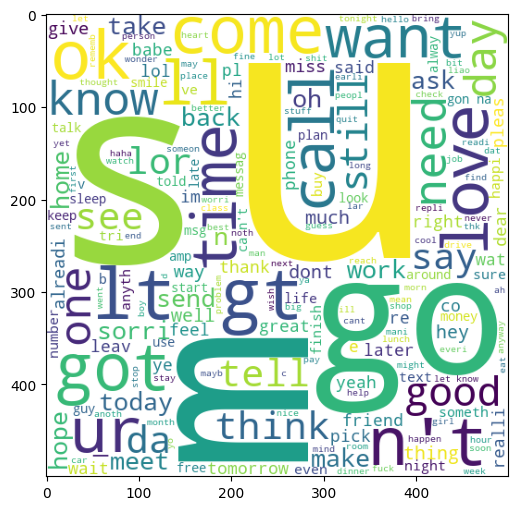

In [135]:
plt.figure(figsize= (15, 6))
plt.imshow(spam_wc)

In [130]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_feature'].str.cat(sep =" "))

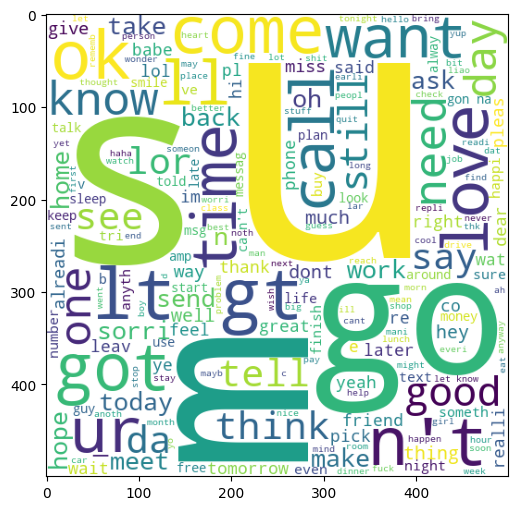

In [133]:
plt.figure(figsize= (15, 6))
plt.imshow(ham_wc)

In [138]:
spam_corpus = []
for message in df[df['label'] == 1]['transformed_feature'].tolist():
    for word in message.split():
        spam_corpus.append(word)

In [140]:
len(spam_corpus)

11083

In [143]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given